In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import re
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import librosa
import librosa.display
from sklearn.preprocessing import minmax_scale
import IPython.display as ipd

plt.rcParams['figure.figsize'] = (20,8)
plt.rcParams['font.size'] = 16
sns.set_style('darkgrid')
warnings.filterwarnings("ignore")

In [3]:
# directory = '../input/dysarthria-detection'
data = pd.read_csv("data_info.csv")
# data['filename'] = data['filename'].apply(lambda x: os.path.join(data,x))
data

is_dysarthria  gender  \
0         dysarthria  female   
1         dysarthria  female   
2         dysarthria  female   
3         dysarthria  female   
4         dysarthria  female   
...              ...     ...   
9410  non_dysarthria    male   
9411  non_dysarthria    male   
9412  non_dysarthria    male   
9413  non_dysarthria    male   
9414  non_dysarthria    male   

                                               filename  
0     ./input/Female with dysarthria/F01_Session1_00...  
1     ./input/Female with dysarthria/F01_Session1_00...  
2     ./input/Female with dysarthria/F01_Session1_00...  
3     ./input/Female with dysarthria/F01_Session1_00...  
4     ./input/Female with dysarthria/F01_Session1_00...  
...                                                 ...  
9410  ./input/Male without dysarthria/MC04_Session2_...  
9411  ./input/Male without dysarthria/MC04_Session2_...  
9412  ./input/Male without dysarthria/MC04_Session2_...  
9413  ./input/Male without dysarthria/MC04_Session2_...  
9414  ./input/Male without dysarthria/MC04_Session2_...  

[9415 rows x 3 columns]

In [31]:
def show_waveplot(audio_path,label,gender):
    x , sr = librosa.load(audio_path)
    plt.figure(figsize=(20, 6))
    librosa.display.waveshow(x, sr=sr)
    plt.title(f"Waveplot: of Class: {label}, Gender: {gender}")

def show_spectrogram(audio_path,label,gender):
    x , sr = librosa.load(audio_path)
    X = librosa.stft(x)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(20,6))
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz',cmap='plasma')
    plt.colorbar()
    plt.title(f"Spectrogram of Class: {label}, Gender: {gender}")
    
def show_zcr(audio_path,label,gender):
    x , sr = librosa.load(audio_path)
    zero_crossings = librosa.zero_crossings(x)
    print("Sum of zero crossing ", zero_crossings.sum())
    plt.figure(figsize=(20, 5))
    plt.title(f'Zero Crossing Rate of Class: {label}, Gender: {gender}')
    zcrs = librosa.feature.zero_crossing_rate(x)
    plt.plot(zcrs[0])
    plt.show()
    
def normalize(x, axis=0):
    return minmax_scale(x, axis=axis)

def show_spectral_centroids(audio_path,label,gender):
    plt.figure(figsize=(20, 5))
    plt.title(f'Spectral Centroids of Class: {label}, Gender: {gender}')
    x , sr = librosa.load(audio_path)
    spectral_centroids = librosa.feature.spectral_centroid(y=x, sr=sr)[0]
    frames = range(len(spectral_centroids))
    t = librosa.frames_to_time(frames)
    librosa.display.waveshow(x, sr=sr, alpha=0.4)
    plt.plot(t, normalize(spectral_centroids), color='r')
    plt.show()
    
def show_spectral_rolloff(audio_path,label,gender):
    plt.figure(figsize=(20, 5))
    plt.title(f'Spectral Rolloff of Class: {label}, Gender: {gender}')
    x , sr = librosa.load(audio_path)
    spectral_rolloff = librosa.feature.spectral_rolloff(y=x, sr=sr, roll_percent=0.01)[0]
    frames = range(len(spectral_rolloff))
    t = librosa.frames_to_time(frames)
    librosa.display.waveshow(x, sr=sr, alpha=0.4)
    plt.plot(t, normalize(spectral_rolloff), color='r')
    plt.show()
    
def show_mfccs(audio_path,label,gender):
    plt.figure(figsize=(20, 6))
    plt.title(f'MFCC of Class: {label}, gender: {gender}')
    x , sr = librosa.load(audio_path)
    mfccs = librosa.feature.mfcc(y=x, sr=sr)
    librosa.display.specshow(mfccs, sr=sr, x_axis='time',cmap='plasma')
    plt.show()
    
def show_melspectro(audio_path,label,gender):
    plt.figure(figsize=(20, 6))
    plt.title(f'Mel Spectro of Class: {label}, Gender: {gender}')
    x , sr = librosa.load(audio_path)
    melspectro = librosa.feature.melspectrogram(y=x, sr=sr)
    librosa.display.specshow(melspectro, sr=sr, x_axis='time',cmap='plasma')
    plt.show()  

In [21]:
data.sample(frac=1).reset_index(drop=True,inplace=True)
male_dysarthric = data[(data['gender']=='male') & (data['is_dysarthria']=='dysarthria')].sample(1)
female_dysarthric = data[(data['gender']=='female') & (data['is_dysarthria']=='dysarthria')].sample(1)
male_ndysarthric = data[(data['gender']=='male') & (data['is_dysarthria']=='non_dysarthria')].sample(1)
female_ndysarthric = data[(data['gender']=='female') & (data['is_dysarthria']=='non_dysarthria')].sample(1)

In [22]:
ipd.Audio(male_dysarthric.iloc[0].filename)

In [23]:
ipd.Audio(female_dysarthric.iloc[0].filename)

In [24]:
ipd.Audio(male_ndysarthric.iloc[0].filename)

In [25]:
ipd.Audio(female_ndysarthric.iloc[0].filename)

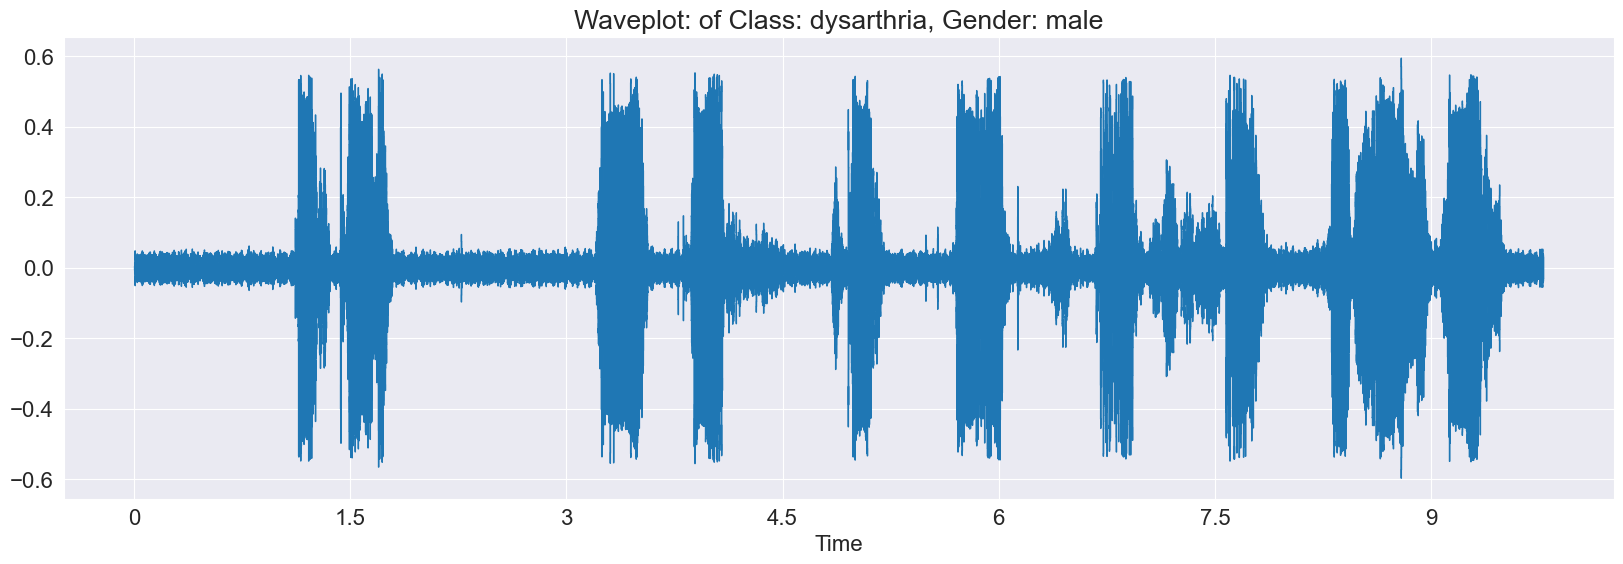

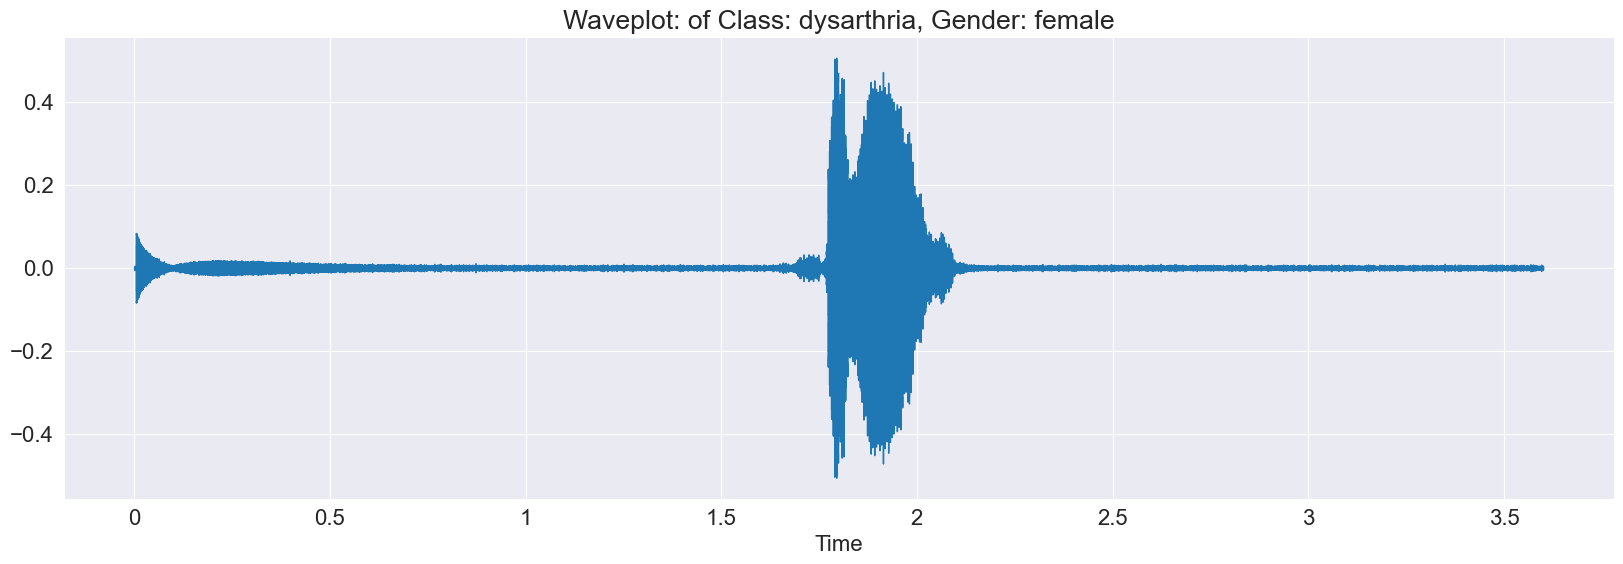

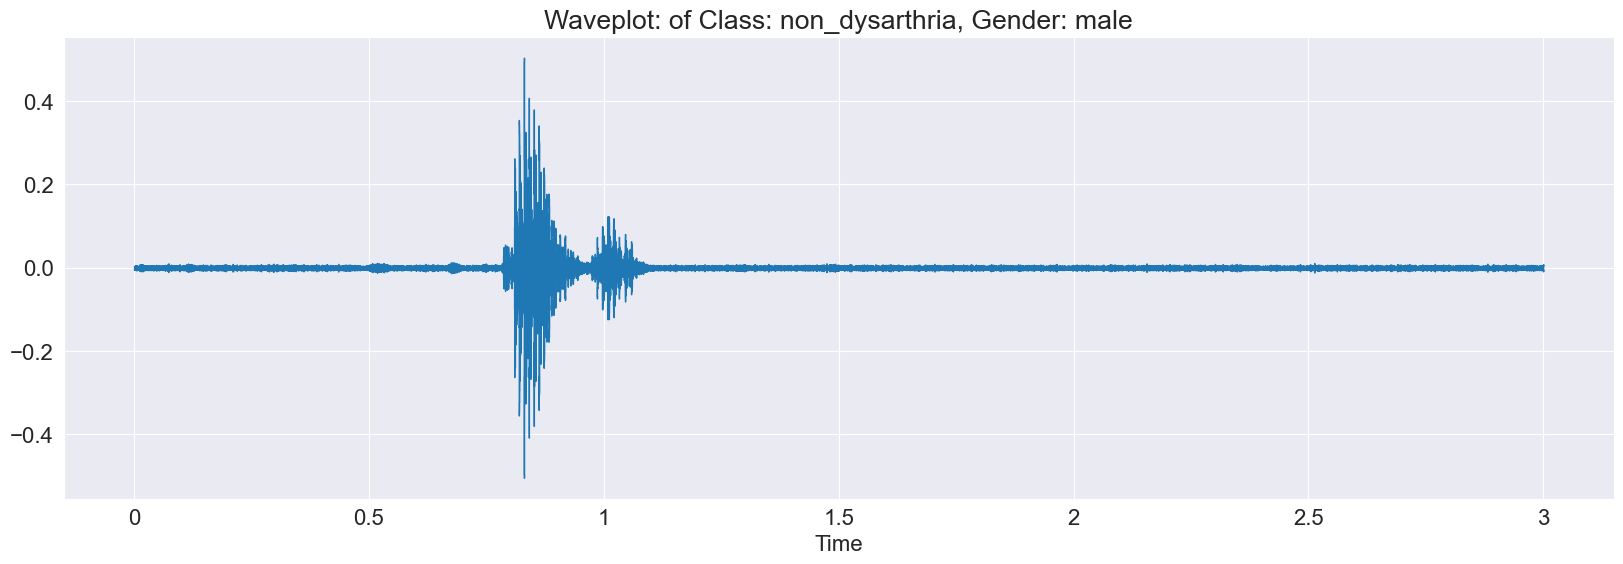

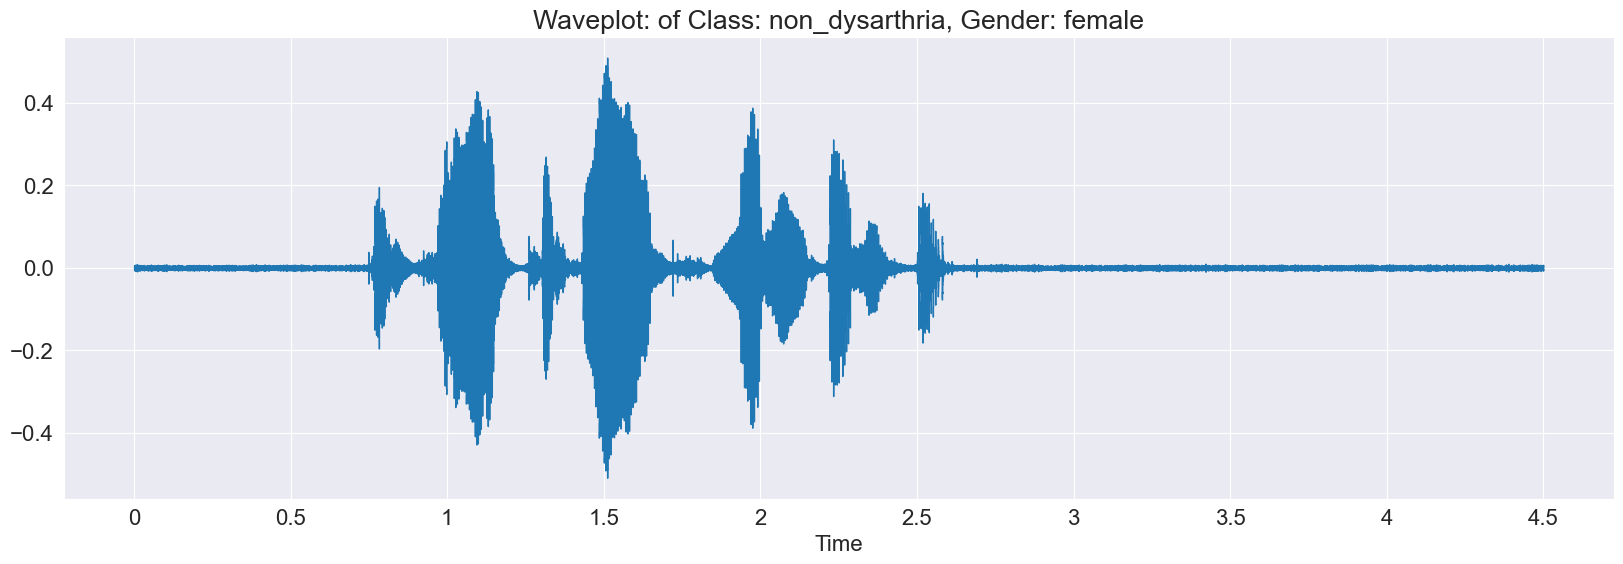

In [26]:
show_waveplot(male_dysarthric.iloc[0].filename, male_dysarthric.iloc[0].is_dysarthria, male_dysarthric.iloc[0].gender)
show_waveplot(female_dysarthric.iloc[0].filename, female_dysarthric.iloc[0].is_dysarthria, female_dysarthric.iloc[0].gender)
show_waveplot(male_ndysarthric.iloc[0].filename, male_ndysarthric.iloc[0].is_dysarthria, male_ndysarthric.iloc[0].gender)
show_waveplot(female_ndysarthric.iloc[0].filename, female_ndysarthric.iloc[0].is_dysarthria, female_ndysarthric.iloc[0].gender)

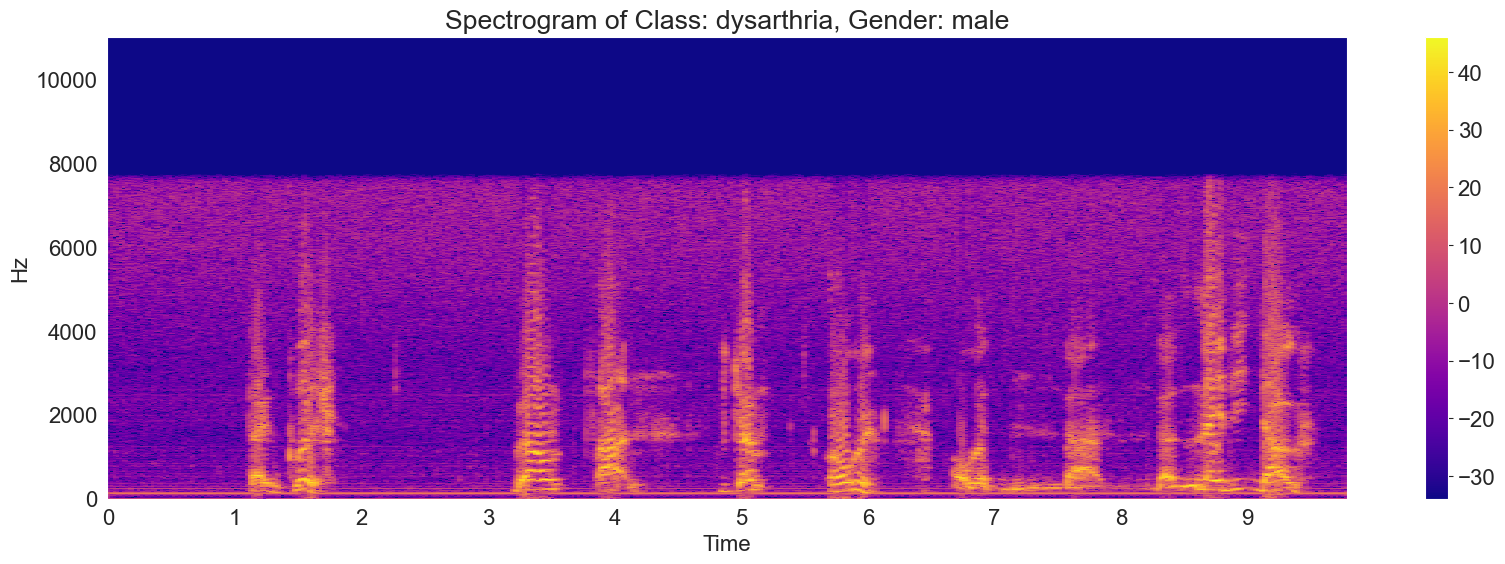

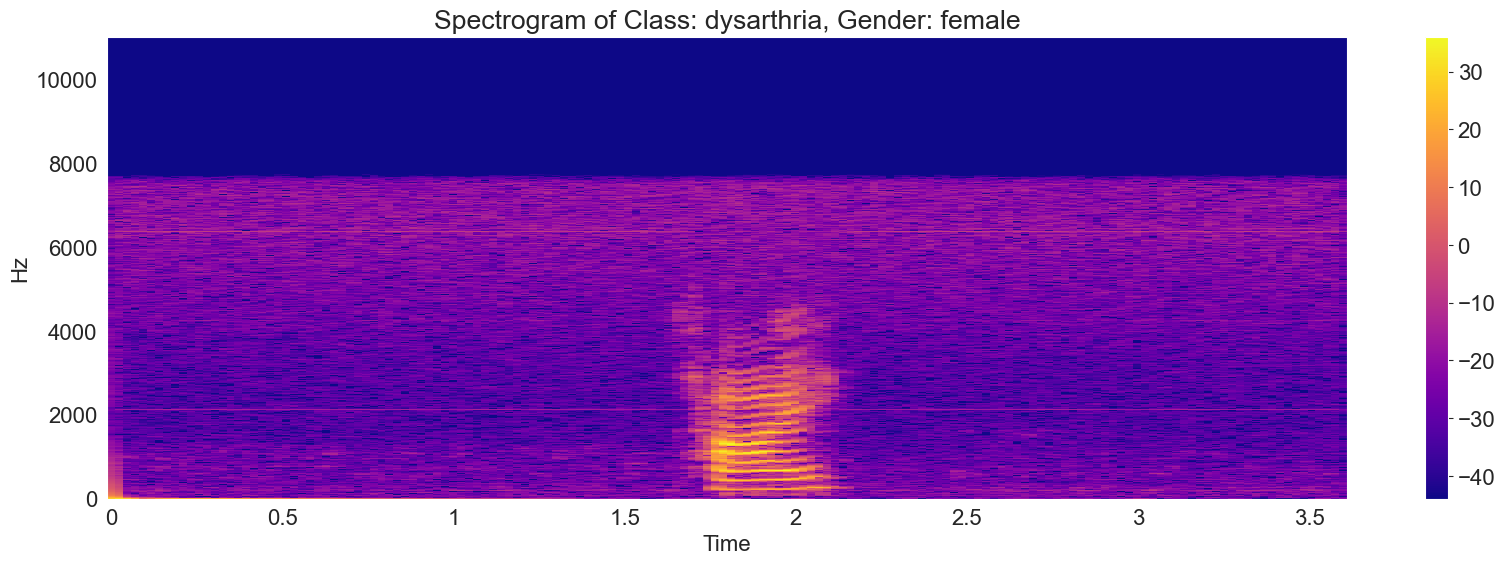

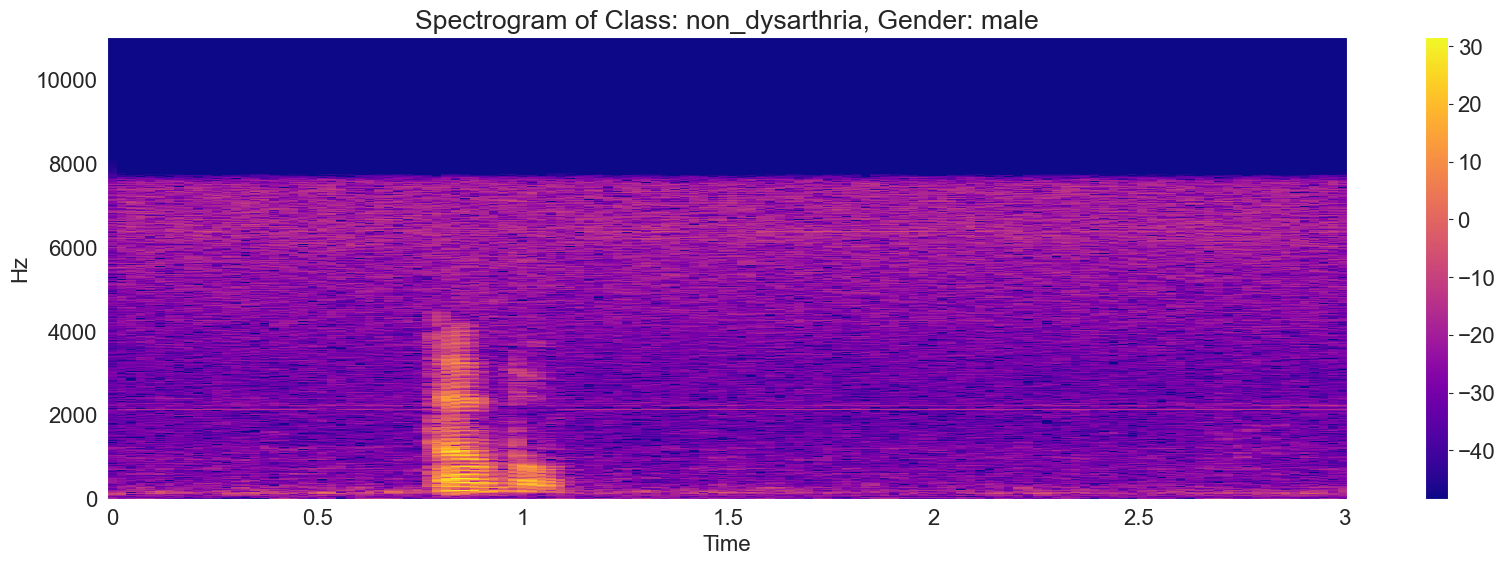

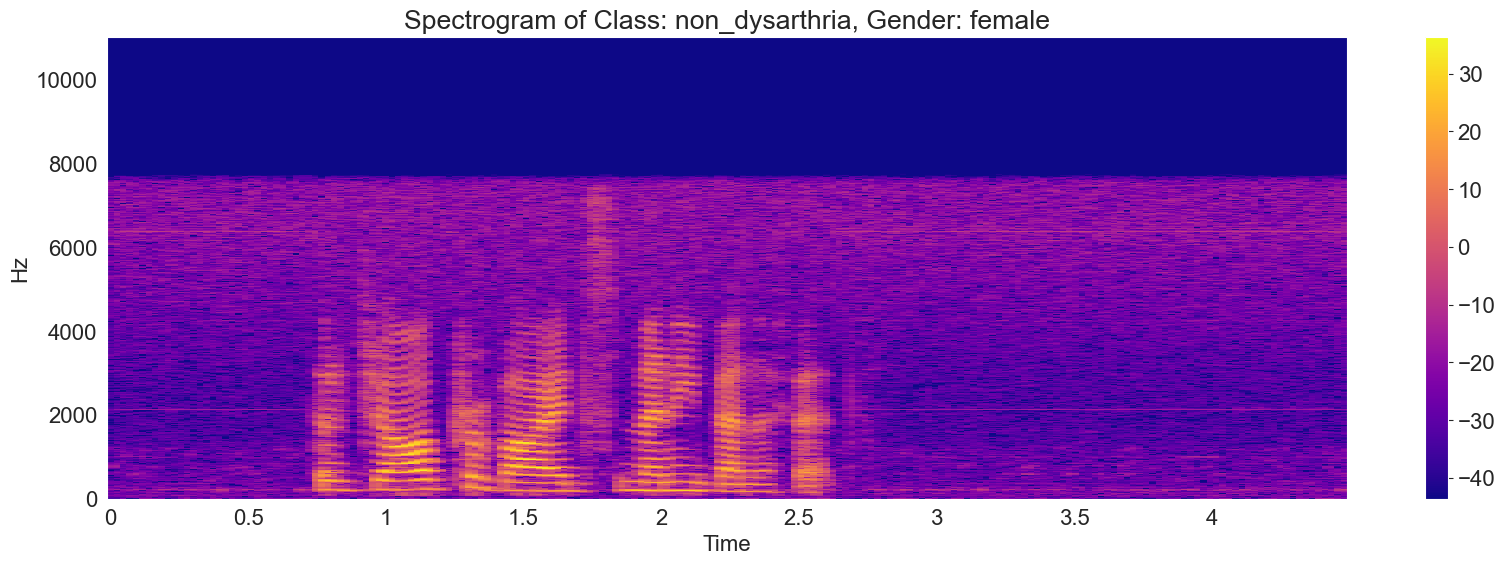

In [27]:
show_spectrogram(male_dysarthric.iloc[0].filename, male_dysarthric.iloc[0].is_dysarthria, male_dysarthric.iloc[0].gender)
show_spectrogram(female_dysarthric.iloc[0].filename, female_dysarthric.iloc[0].is_dysarthria, female_dysarthric.iloc[0].gender)
show_spectrogram(male_ndysarthric.iloc[0].filename, male_ndysarthric.iloc[0].is_dysarthria, male_ndysarthric.iloc[0].gender)
show_spectrogram(female_ndysarthric.iloc[0].filename, female_ndysarthric.iloc[0].is_dysarthria, female_ndysarthric.iloc[0].gender)

Sum of zero crossing  34782


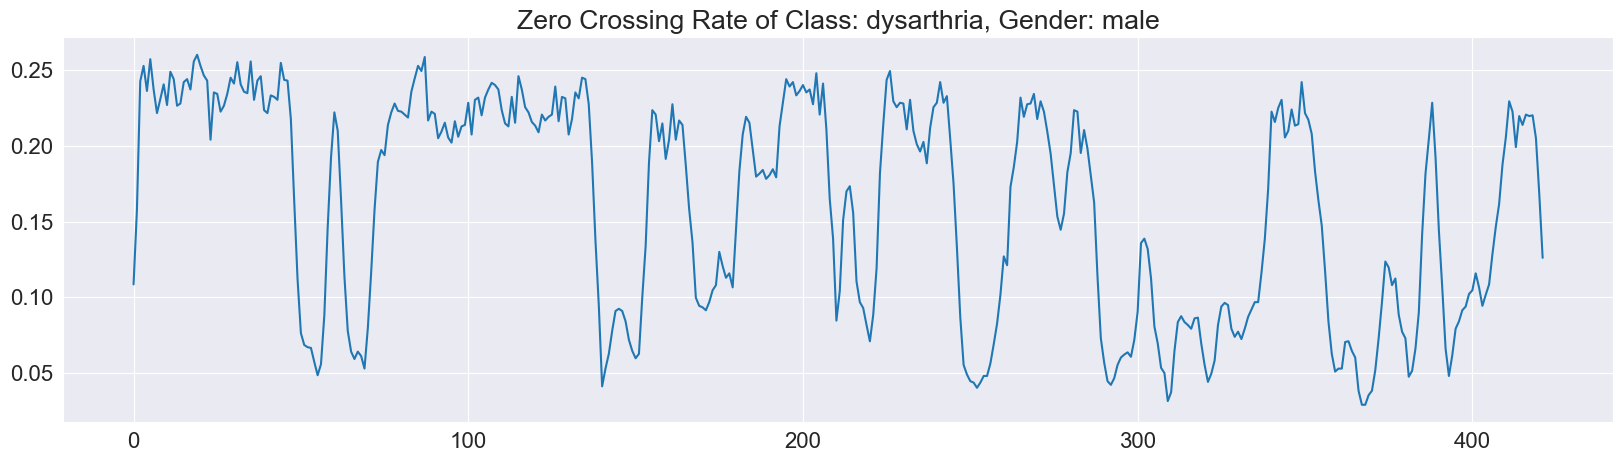

Sum of zero crossing  28611


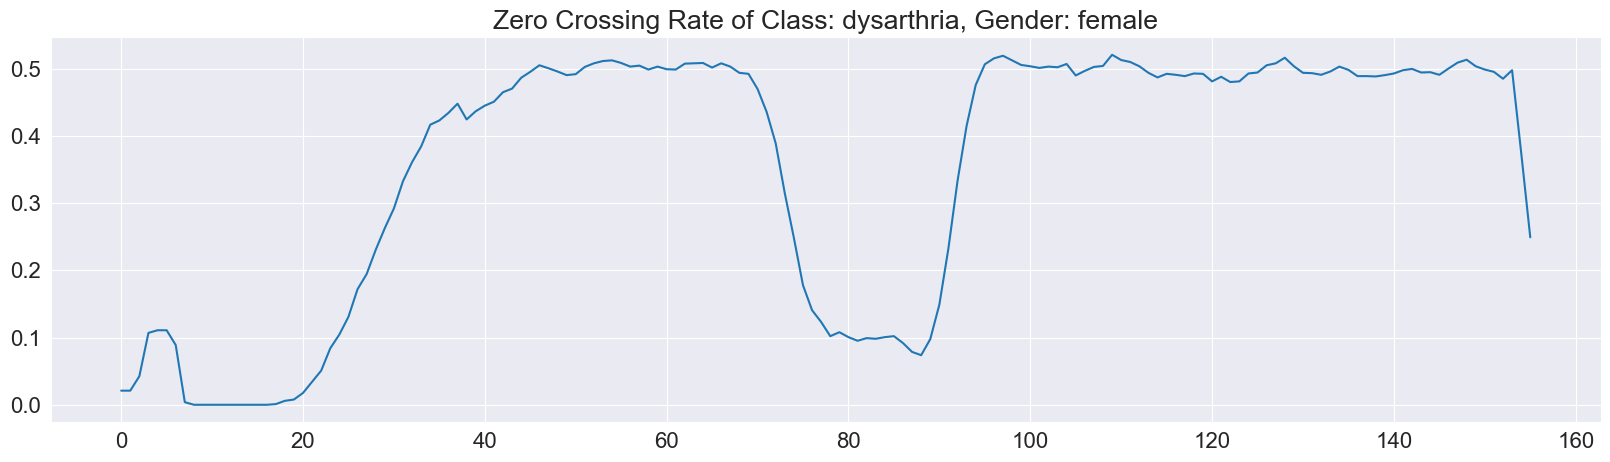

Sum of zero crossing  28077


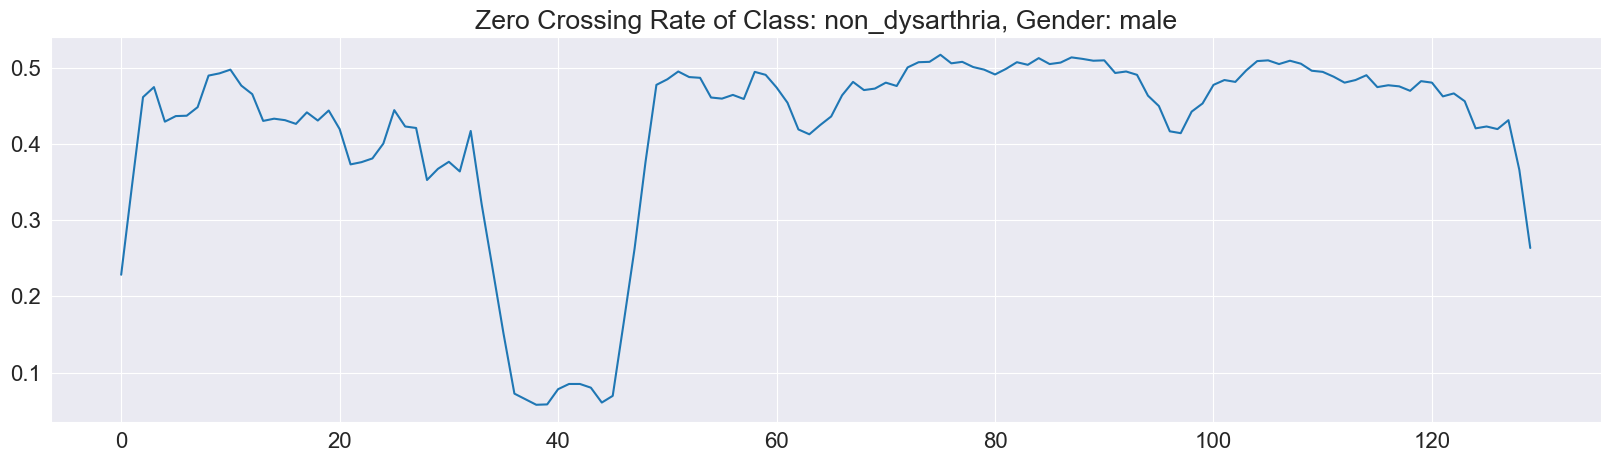

Sum of zero crossing  34487


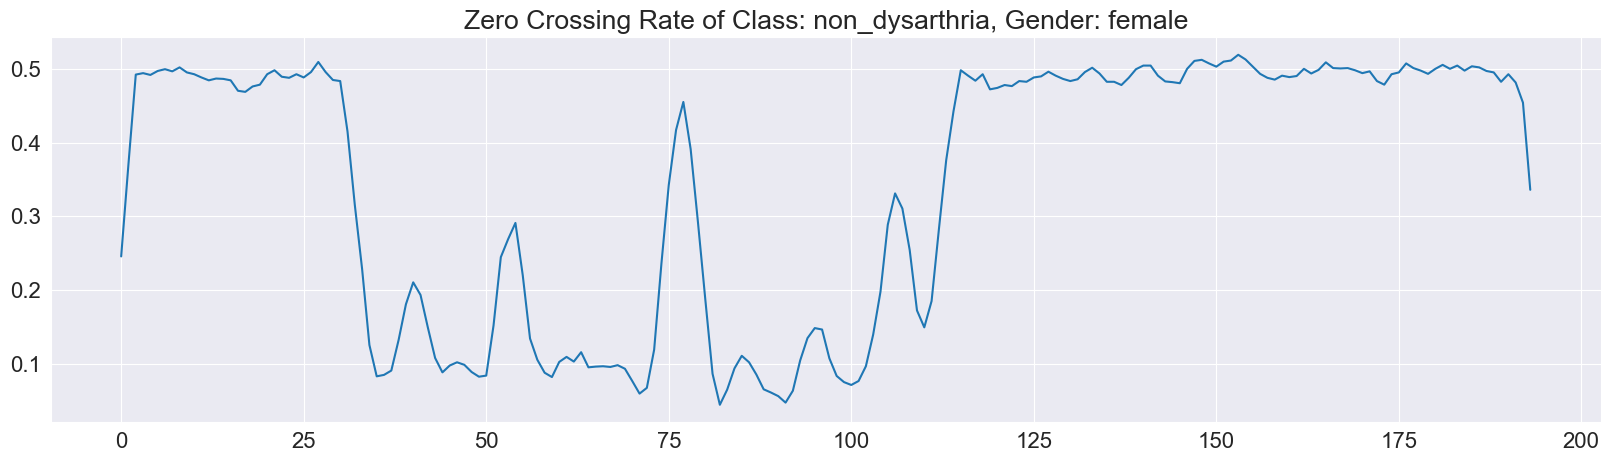

In [28]:
show_zcr(male_dysarthric.iloc[0].filename, male_dysarthric.iloc[0].is_dysarthria, male_dysarthric.iloc[0].gender)
show_zcr(female_dysarthric.iloc[0].filename, female_dysarthric.iloc[0].is_dysarthria, female_dysarthric.iloc[0].gender)
show_zcr(male_ndysarthric.iloc[0].filename, male_ndysarthric.iloc[0].is_dysarthria, male_ndysarthric.iloc[0].gender)
show_zcr(female_ndysarthric.iloc[0].filename, female_ndysarthric.iloc[0].is_dysarthria, female_ndysarthric.iloc[0].gender)

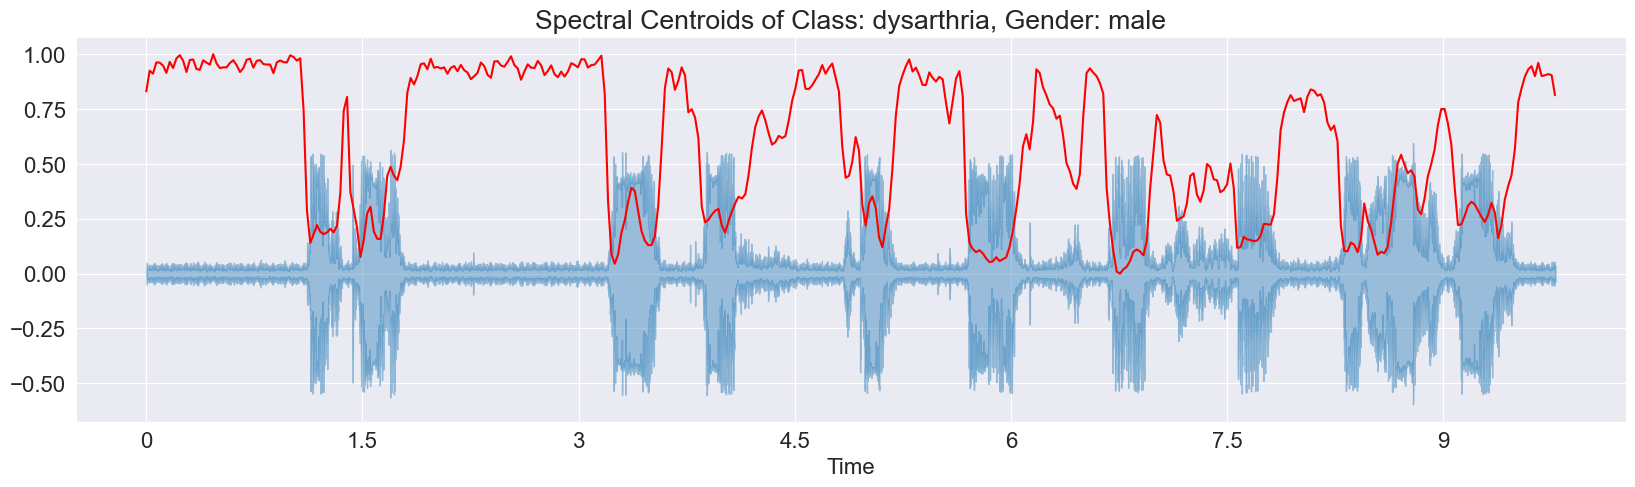

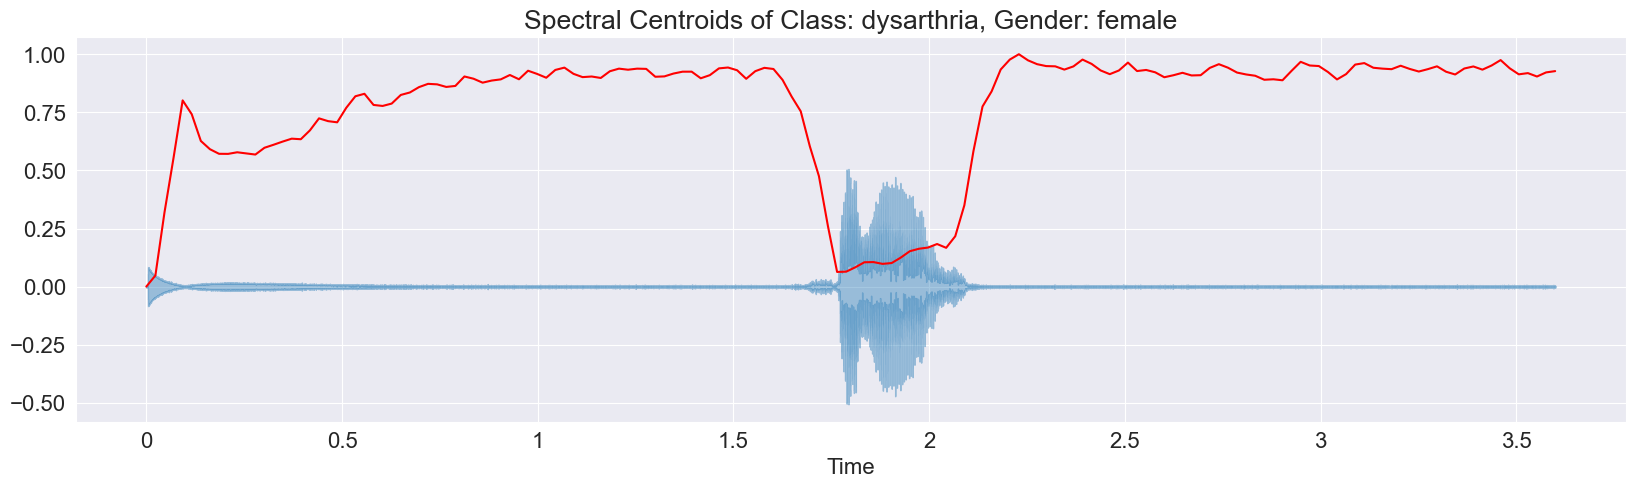

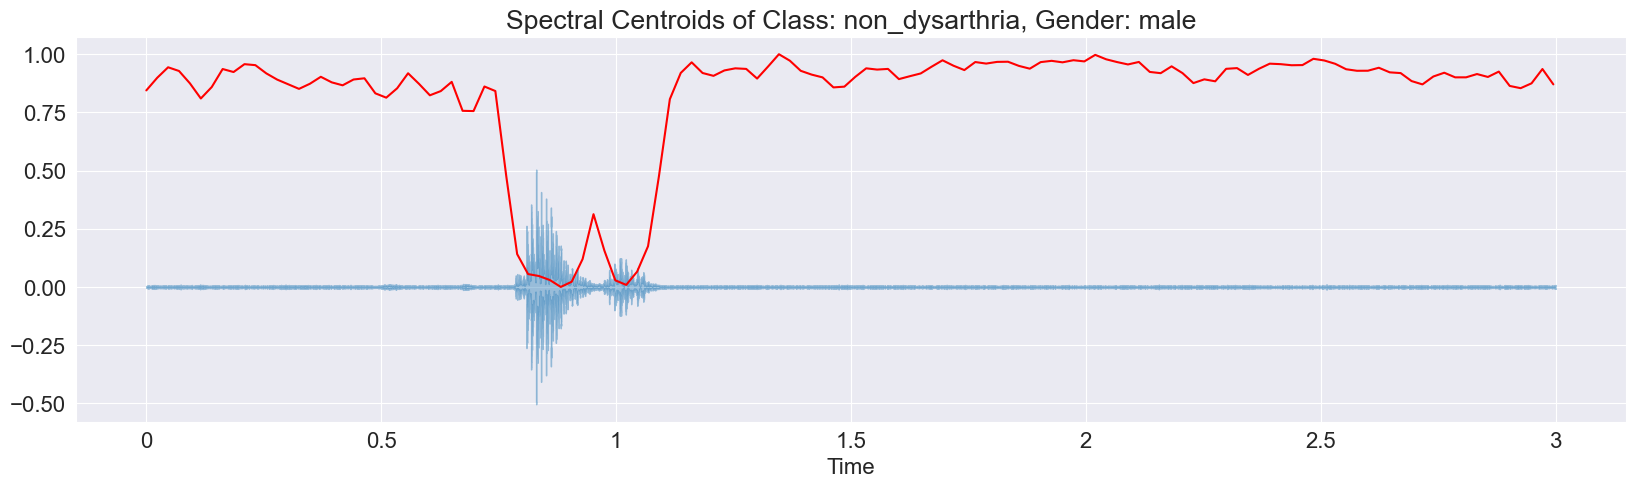

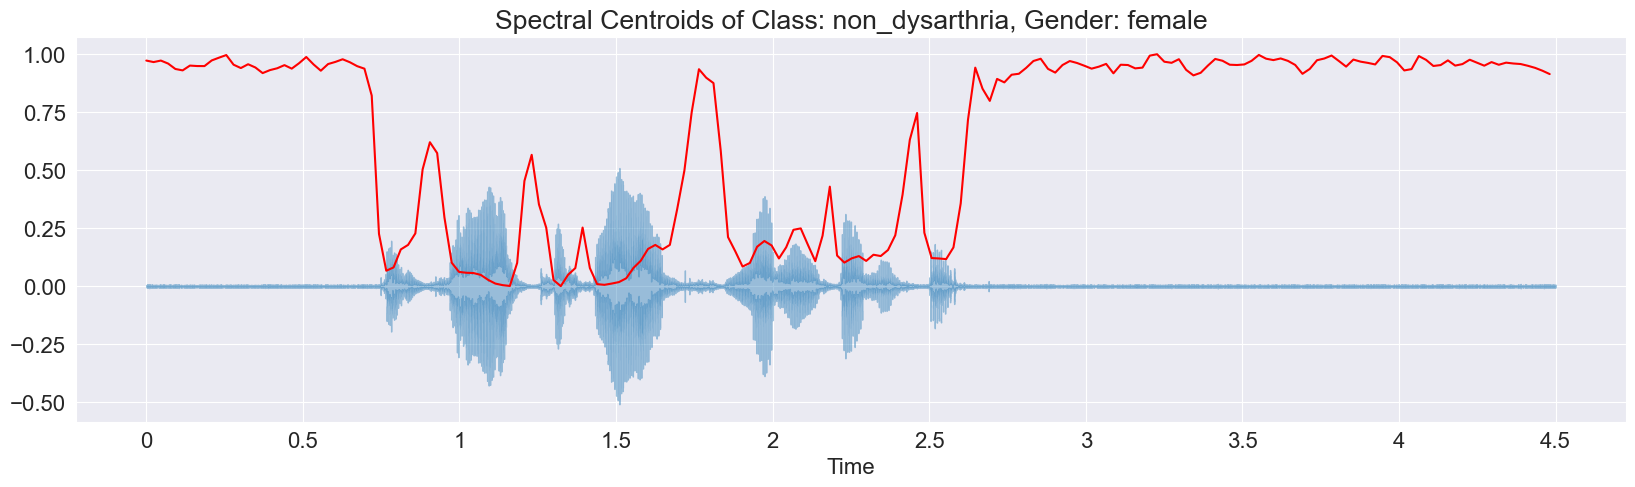

In [29]:
show_spectral_centroids(male_dysarthric.iloc[0].filename, male_dysarthric.iloc[0].is_dysarthria, male_dysarthric.iloc[0].gender)
show_spectral_centroids(female_dysarthric.iloc[0].filename, female_dysarthric.iloc[0].is_dysarthria, female_dysarthric.iloc[0].gender)
show_spectral_centroids(male_ndysarthric.iloc[0].filename, male_ndysarthric.iloc[0].is_dysarthria, male_ndysarthric.iloc[0].gender)
show_spectral_centroids(female_ndysarthric.iloc[0].filename, female_ndysarthric.iloc[0].is_dysarthria, female_ndysarthric.iloc[0].gender)

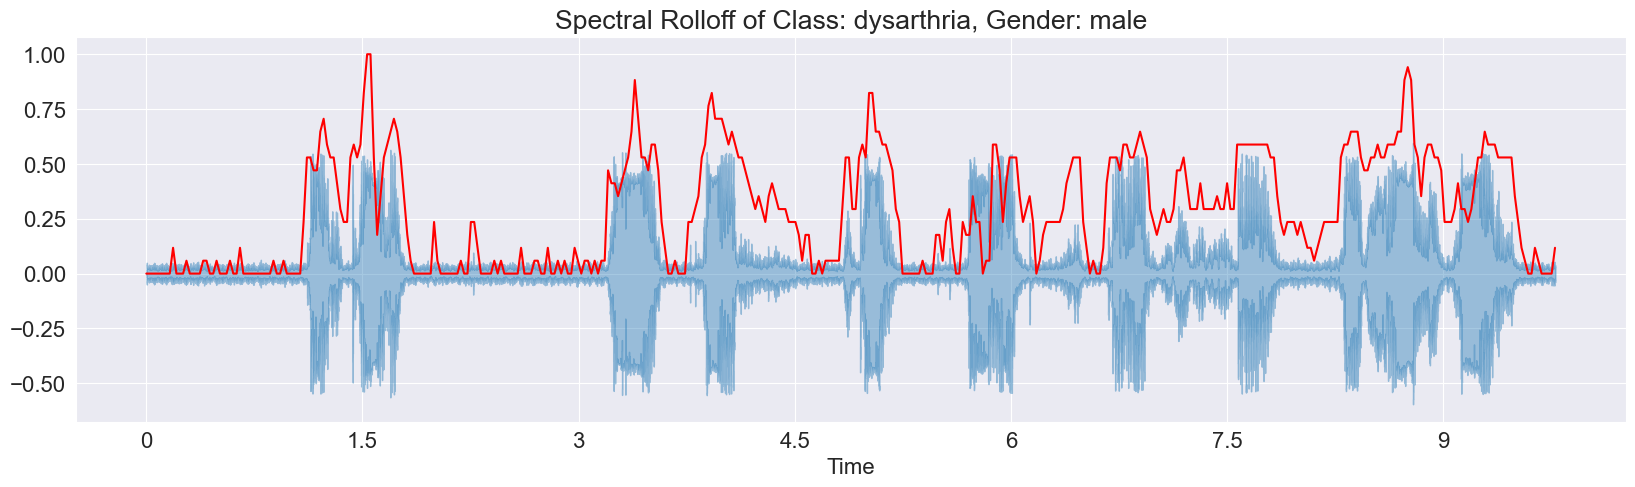

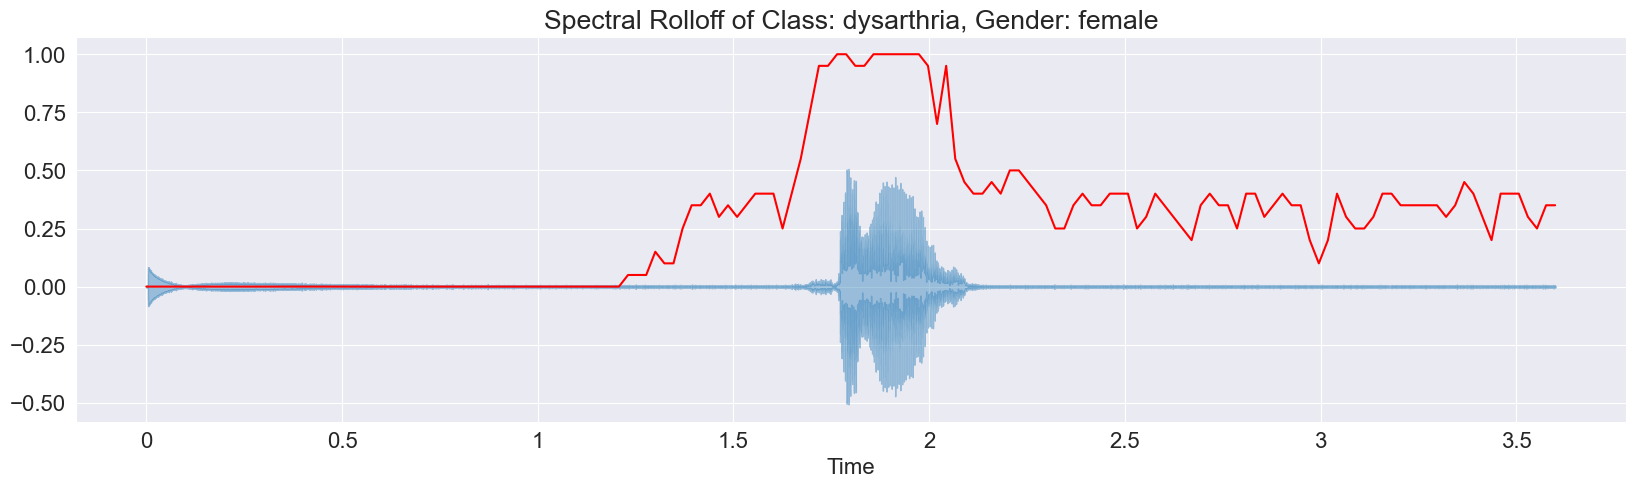

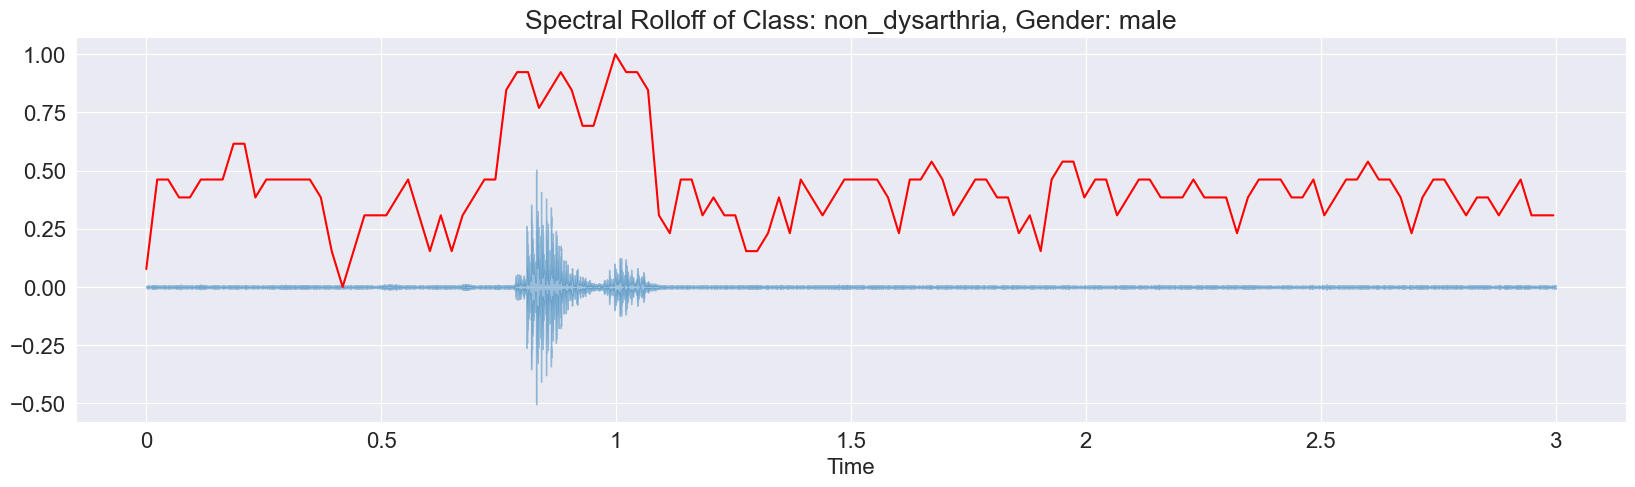

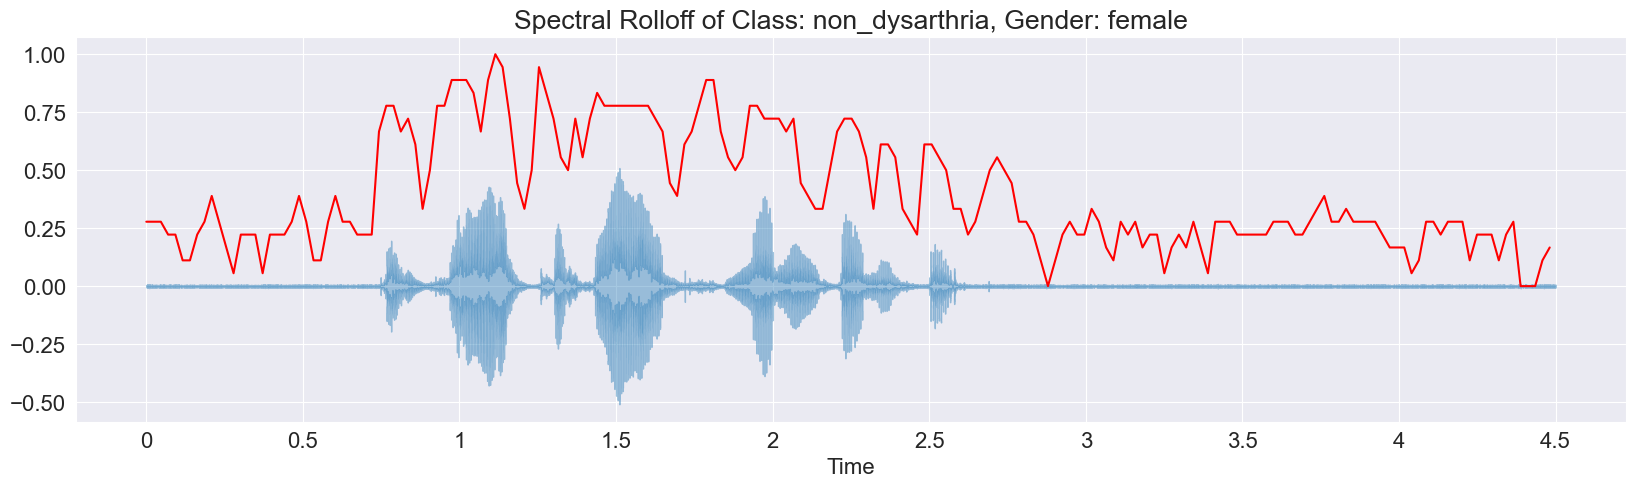

In [32]:
show_spectral_rolloff(male_dysarthric.iloc[0].filename, male_dysarthric.iloc[0].is_dysarthria, male_dysarthric.iloc[0].gender)
show_spectral_rolloff(female_dysarthric.iloc[0].filename, female_dysarthric.iloc[0].is_dysarthria, female_dysarthric.iloc[0].gender)
show_spectral_rolloff(male_ndysarthric.iloc[0].filename, male_ndysarthric.iloc[0].is_dysarthria, male_ndysarthric.iloc[0].gender)
show_spectral_rolloff(female_ndysarthric.iloc[0].filename, female_ndysarthric.iloc[0].is_dysarthria, female_ndysarthric.iloc[0].gender)

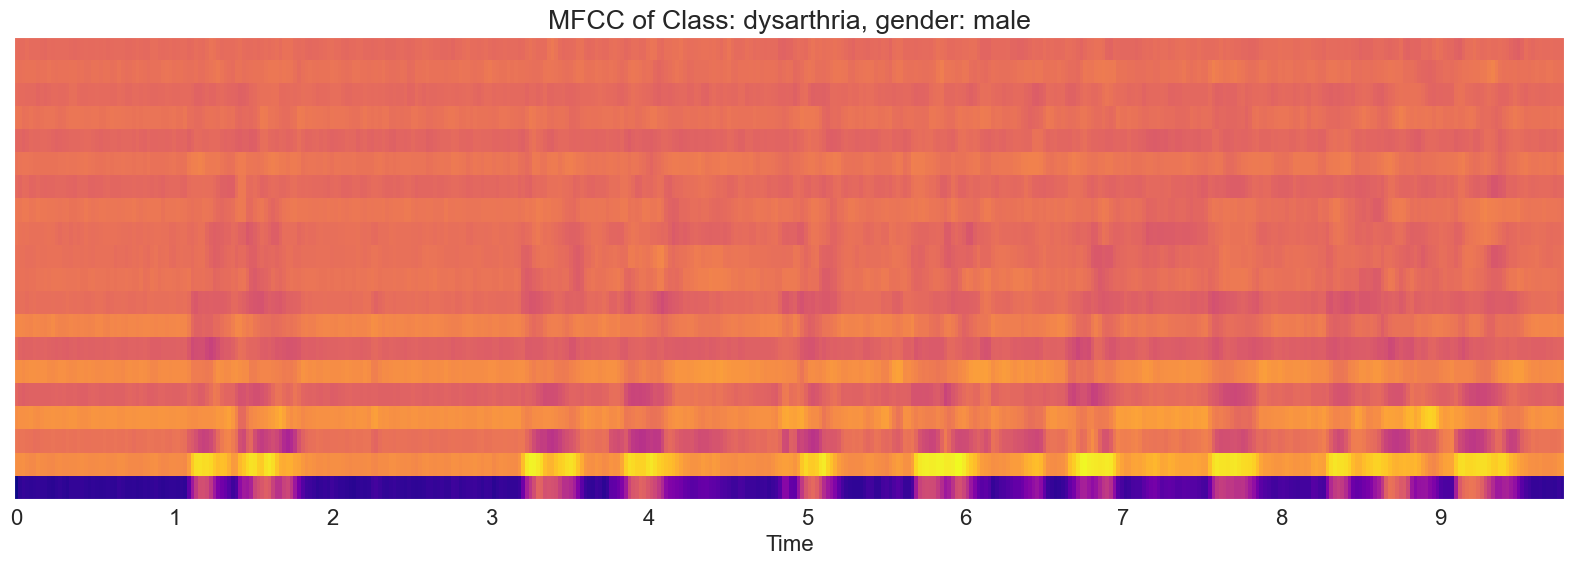

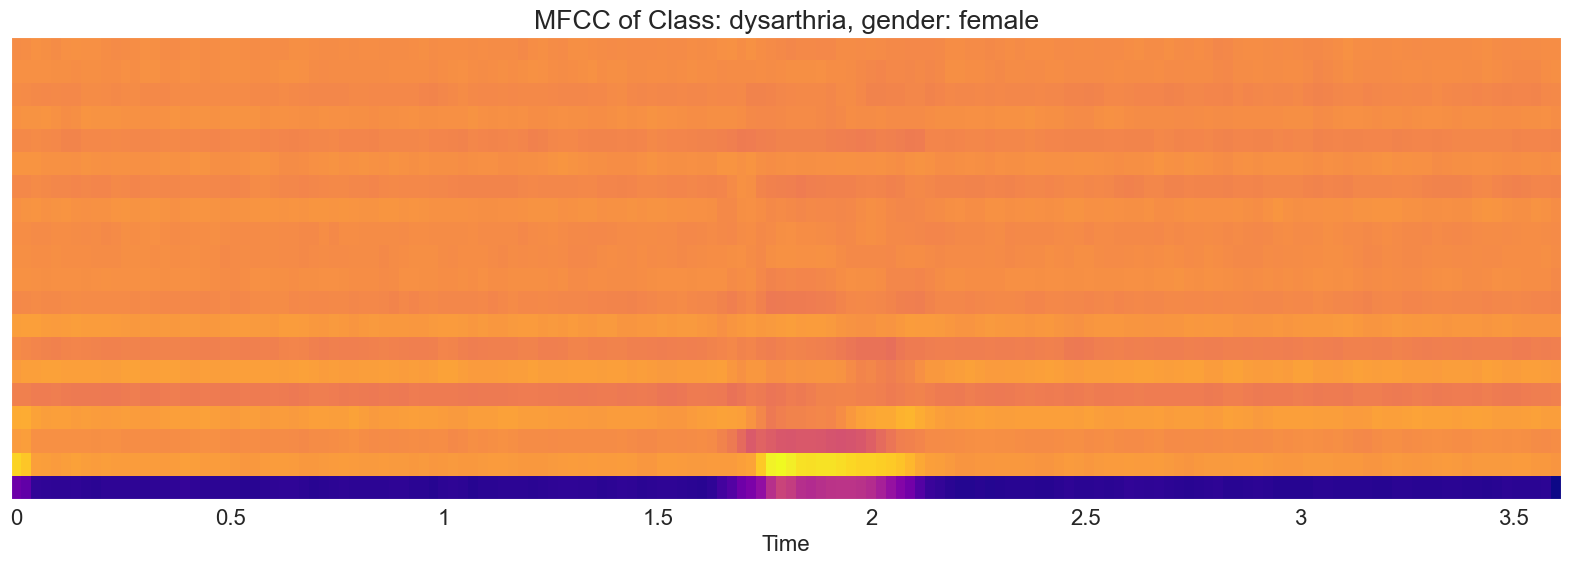

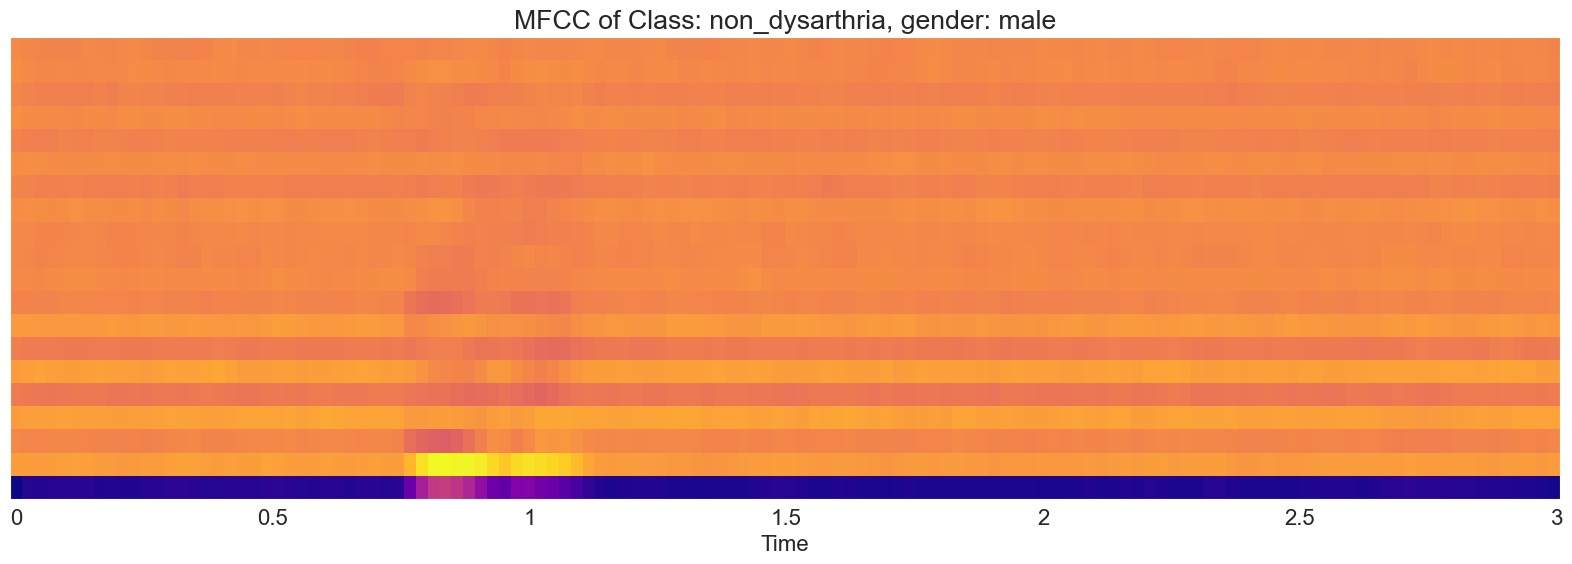

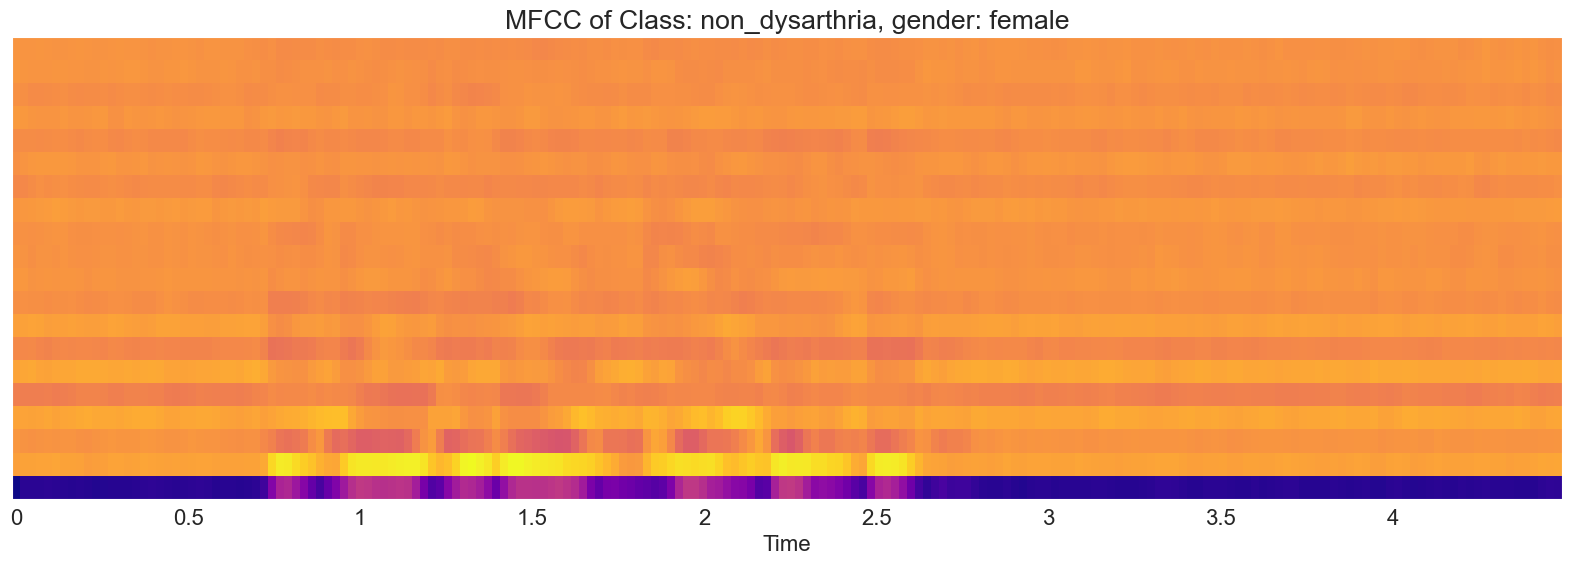

In [33]:
show_mfccs(male_dysarthric.iloc[0].filename, male_dysarthric.iloc[0].is_dysarthria, male_dysarthric.iloc[0].gender)
show_mfccs(female_dysarthric.iloc[0].filename, female_dysarthric.iloc[0].is_dysarthria, female_dysarthric.iloc[0].gender)
show_mfccs(male_ndysarthric.iloc[0].filename, male_ndysarthric.iloc[0].is_dysarthria, male_ndysarthric.iloc[0].gender)
show_mfccs(female_ndysarthric.iloc[0].filename, female_ndysarthric.iloc[0].is_dysarthria, female_ndysarthric.iloc[0].gender)

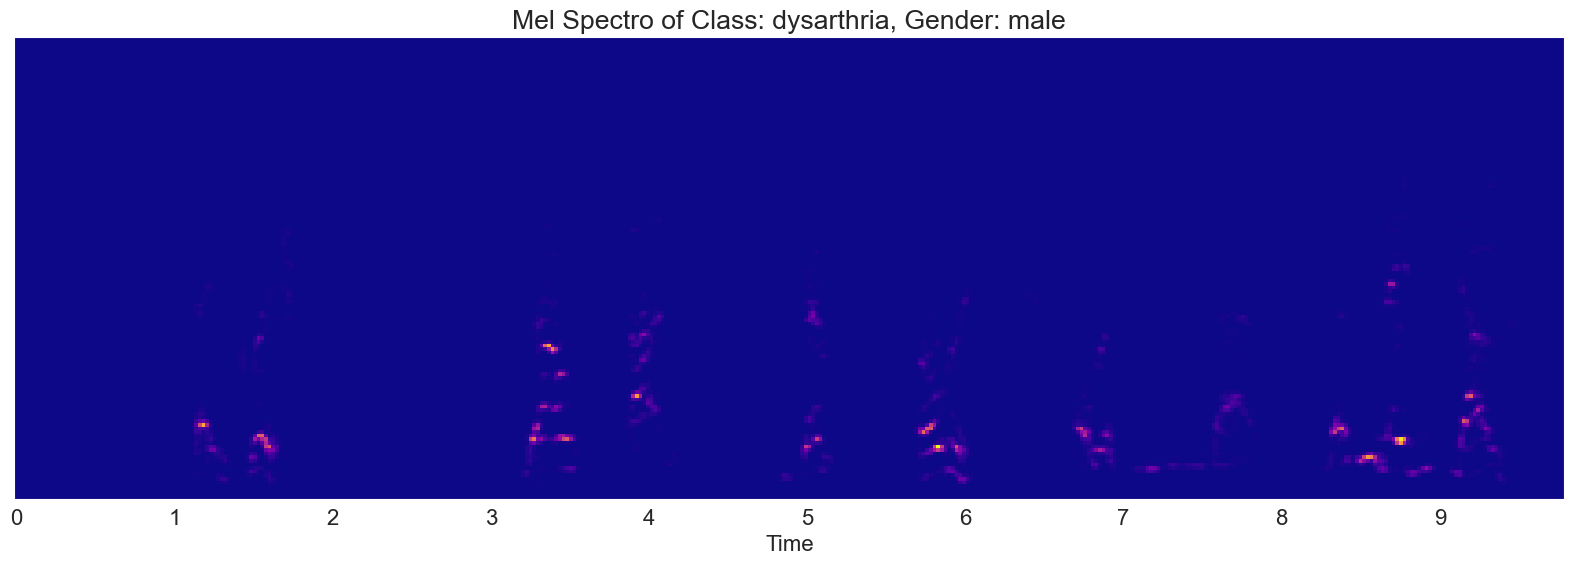

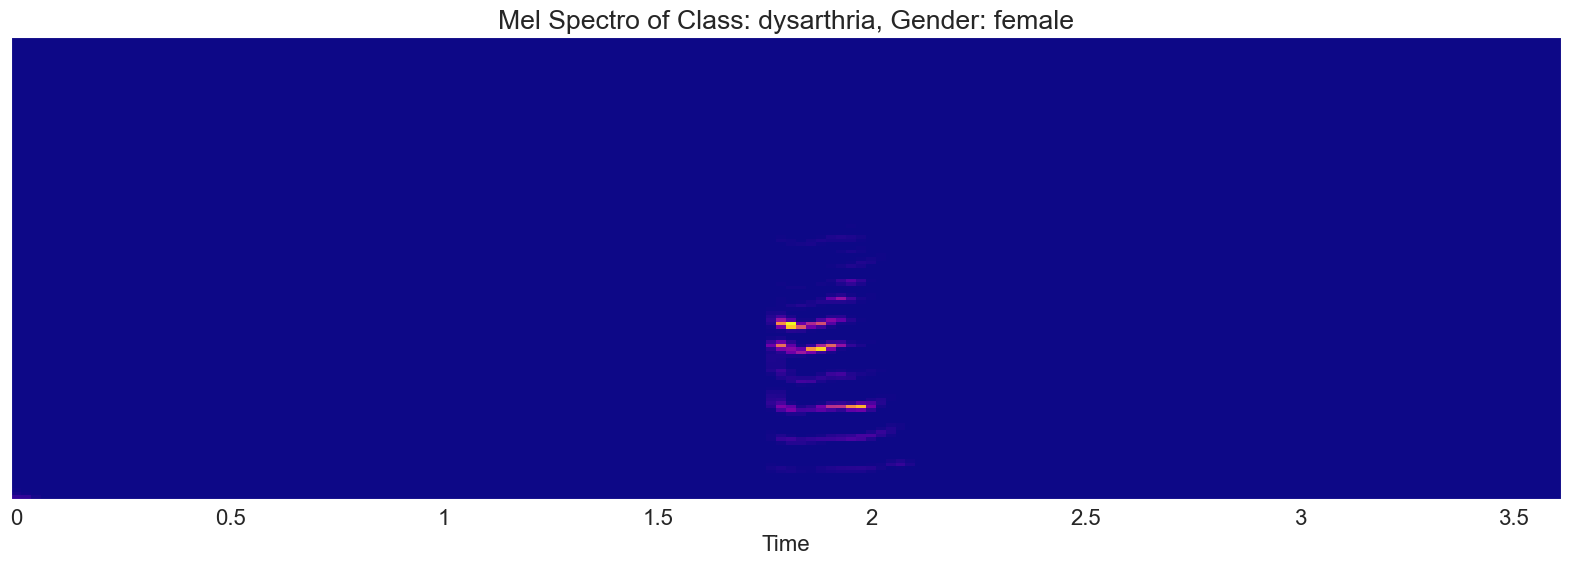

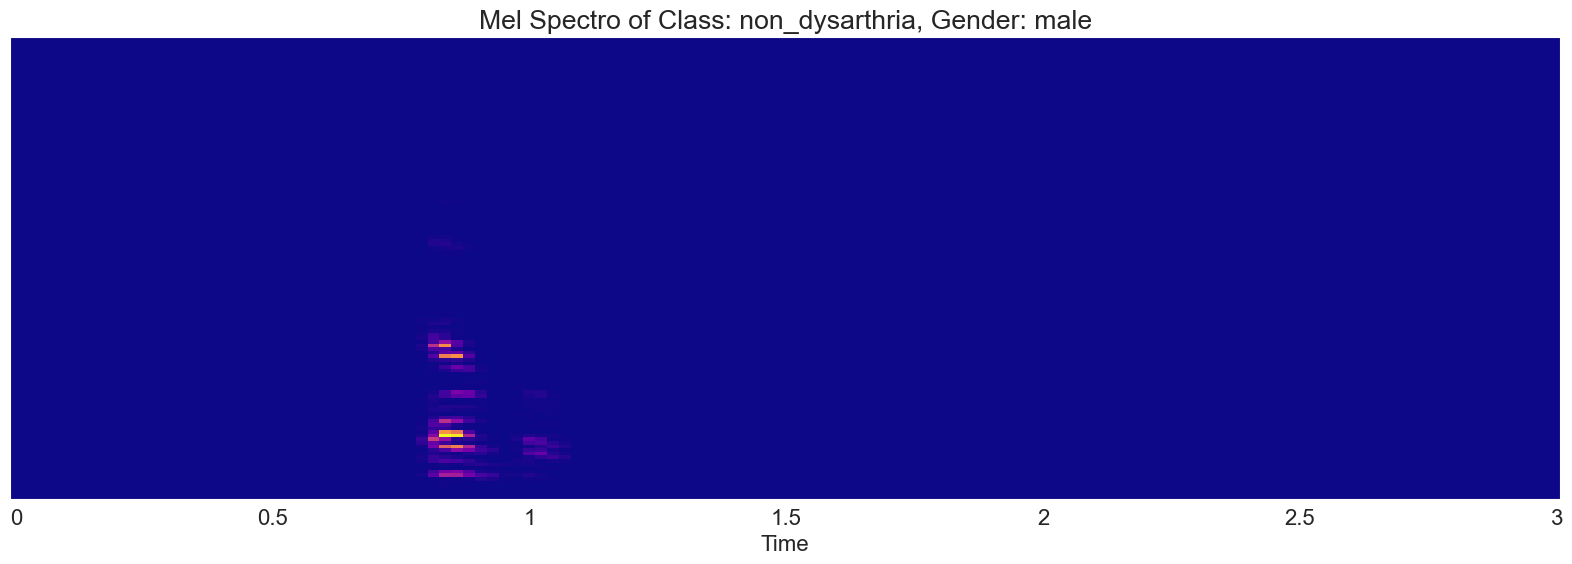

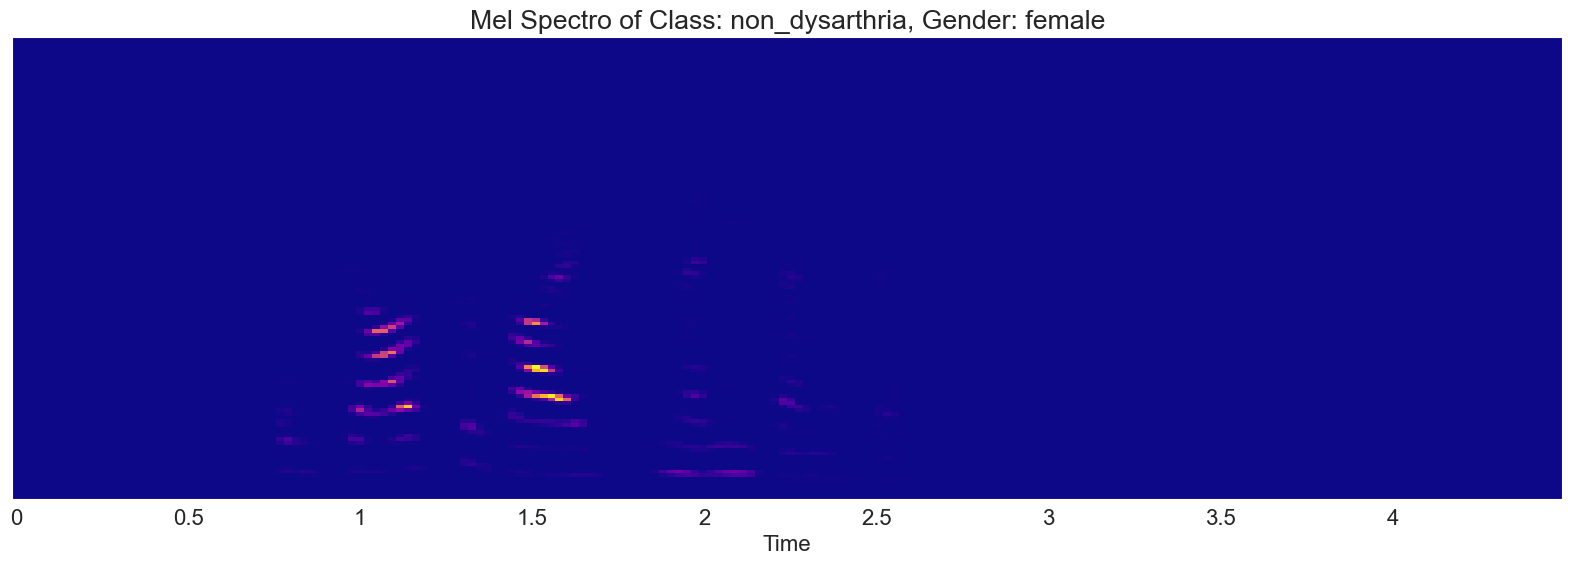

In [34]:
show_melspectro(male_dysarthric.iloc[0].filename, male_dysarthric.iloc[0].is_dysarthria, male_dysarthric.iloc[0].gender)
show_melspectro(female_dysarthric.iloc[0].filename, female_dysarthric.iloc[0].is_dysarthria, female_dysarthric.iloc[0].gender)
show_melspectro(male_ndysarthric.iloc[0].filename, male_ndysarthric.iloc[0].is_dysarthria, male_ndysarthric.iloc[0].gender)
show_melspectro(female_ndysarthric.iloc[0].filename, female_ndysarthric.iloc[0].is_dysarthria, female_ndysarthric.iloc[0].gender)

In [72]:
from tqdm import tqdm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, recall_score

In [182]:
def feature_extraction(df):
    features = []
    for i,record in tqdm(df.iterrows(),total=df.shape[0]):
        try:
            x , sr = librosa.load(record['filename'])
            mean_mfcc = np.mean(librosa.feature.mfcc(y=x, sr=sr, n_mfcc=64),axis=1)
            features.append(mean_mfcc)
        except EOFError:
            pass
        
    dataf = pd.DataFrame(features)
    dataf['class'] = df['is_dysarthria']
    return dataf

In [183]:
dataf = feature_extraction(data)

100%|█████████████████████████████████████████████████████████████████████████████| 9415/9415 [01:22<00:00, 113.47it/s]


In [184]:
dataf.to_csv("MFCC_Data.csv")

In [185]:
dataf.describe()

0            1            2            3            4   \
count  9415.000000  9415.000000  9415.000000  9415.000000  9415.000000   
mean   -387.517273    59.140831   -20.412622    37.770844   -30.430397   
std      78.820450    18.706453    11.233615    11.356652    10.830503   
min   -1131.370850     0.000000   -97.692009   -22.287735   -85.404167   
25%    -420.135666    45.843298   -26.950364    30.560168   -37.355328   
50%    -399.602325    55.665546   -19.646671    37.461349   -31.346832   
75%    -353.865707    69.197971   -13.045387    44.754427   -24.283106   
max     -17.724464   133.369919    19.781712    96.544289     9.382762   

                5            6            7            8            9   ...  \
count  9415.000000  9415.000000  9415.000000  9415.000000  9415.000000  ...   
mean     32.288921   -29.396711    19.164227   -14.946452     1.482579  ...   
std      10.242598     6.501265     7.565865     4.899192     4.499052  ...   
min     -13.222373   -61.756844    -7.768124   -41.841721   -23.854530  ...   
25%      25.723719   -33.431492    14.446242   -17.552649    -1.215975  ...   
50%      33.121128   -29.172396    19.958414   -14.399492     2.125807  ...   
75%      39.021545   -24.927786    24.342547   -11.702730     4.533877  ...   
max      83.191544     0.000000    53.833206     1.979633    20.269789  ...   

                54           55           56           57           58  \
count  9415.000000  9415.000000  9415.000000  9415.000000  9415.000000   
mean      1.689267    -1.963630     1.266362    -0.931559     1.299697   
std       1.306952     1.428790     1.820495     1.863215     1.538571   
min      -5.592297   -13.472562    -7.820179   -12.365548    -7.006651   
25%       0.860084    -2.766139     0.380748    -1.642948     0.406784   
50%       1.608021    -1.977334     1.295759    -0.770900     1.347279   
75%       2.456989    -1.123546     2.338080     0.104952     2.219607   
max       7.749358    11.231887    13.873447    10.499300    16.395365   

                59           60           61           62           63  
count  9415.000000  9415.000000  9415.000000  9415.000000  9415.000000  
mean     -1.023608    -0.560909     1.054397     0.107176     0.906913  
std       1.489892     1.787641     1.447644     1.519964     1.384222  
min     -10.437763   -13.600515    -9.676705    -8.546318    -6.045423  
25%      -1.975333    -1.691616     0.122470    -0.687970     0.152859  
50%      -1.093616    -0.810521     0.949051     0.168504     0.902589  
75%      -0.152032     0.183359     1.863573     1.001954     1.699229  
max      10.760921    12.520375    16.388826    15.154850    14.573307  

[8 rows x 64 columns]

In [186]:
dataf.loc[dataf['class']=='non_dysarthria','class'] = 0.0
dataf.loc[dataf['class']=='dysarthria','class'] = 1.0
dataf['class'] = dataf['class'].astype(float)

X = dataf.iloc[:,:-1].values
y = dataf.iloc[:,-1]

In [187]:
X.shape, y.shape

((9415, 64), (9415,))

In [188]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, stratify=y)
X_train = X_train.reshape(-1,16,4,1)
X_test = X_test.reshape(-1,16,4,1)

In [189]:
len(X_train)

8473

In [190]:
len(y_train)

8473

In [191]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [204]:
model = Sequential([
    InputLayer(input_shape=(16, 4, 1)),
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding = "same"),
    MaxPooling2D(2, 2),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = "same"),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 16, 4, 32)         320       
                                                                 
 max_pooling2d_20 (MaxPooli  (None, 8, 2, 32)          0         
 ng2D)                                                           
                                                                 
 conv2d_21 (Conv2D)          (None, 8, 2, 64)          18496     
                                                                 
 max_pooling2d_21 (MaxPooli  (None, 4, 1, 64)          0         
 ng2D)                                                           
                                                                 
 flatten_10 (Flatten)        (None, 256)               0         
                                                                 
 dense_20 (Dense)            (None, 32)              

In [205]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [206]:
model_name = "model.h5"
checkpoint = ModelCheckpoint(model_name,
                            monitor="val_loss",
                            mode="min",
                            save_best_only = True,
                            verbose=1)

earlystopping = EarlyStopping(monitor='val_loss',min_delta = 0, patience = 5, verbose = 1, restore_best_weights=True)

In [207]:
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test,y_test), callbacks=[checkpoint,earlystopping])

Epoch 1/50
255/265 [===========================>..] - ETA: 0s - loss: 0.4906 - accuracy: 0.8151
Epoch 1: val_loss improved from inf to 0.26464, saving model to model.h5
265/265 [==============================] - 2s 4ms/step - loss: 0.4857 - accuracy: 0.8154 - val_loss: 0.2646 - val_accuracy: 0.9151
Epoch 2/50
249/265 [===========================>..] - ETA: 0s - loss: 0.1960 - accuracy: 0.9270
Epoch 2: val_loss improved from 0.26464 to 0.13624, saving model to model.h5
265/265 [==============================] - 1s 3ms/step - loss: 0.1936 - accuracy: 0.9292 - val_loss: 0.1362 - val_accuracy: 0.9586
Epoch 3/50
249/265 [===========================>..] - ETA: 0s - loss: 0.1274 - accuracy: 0.9583
Epoch 3: val_loss improved from 0.13624 to 0.13355, saving model to model.h5
265/265 [==============================] - 1s 3ms/step - loss: 0.1272 - accuracy: 0.9586 - val_loss: 0.1336 - val_accuracy: 0.9448
Epoch 4/50
258/265 [============================>.] - ETA: 0s - loss: 0.0930 - accuracy: 0.9

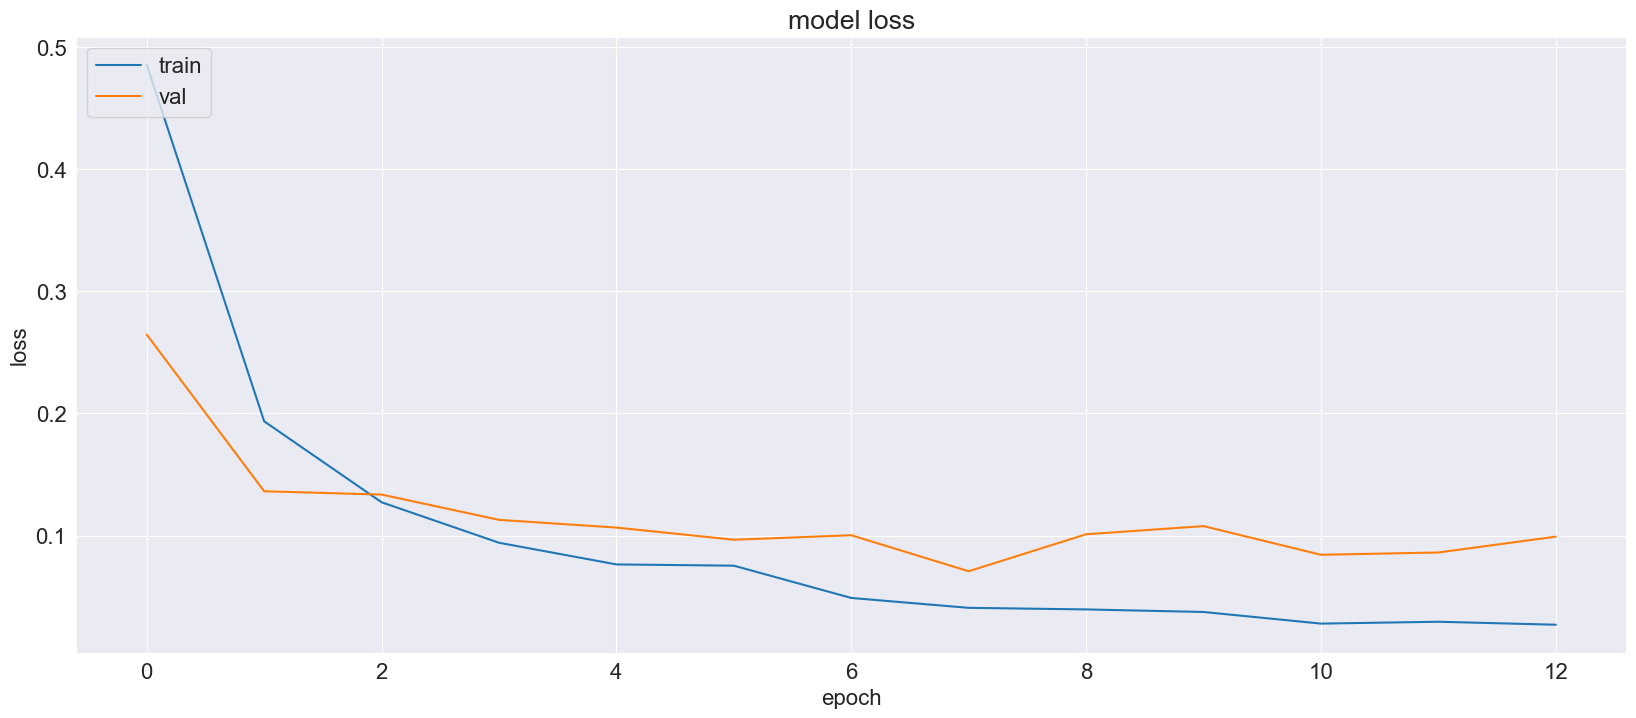

In [208]:
plt.figure(figsize=(20,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

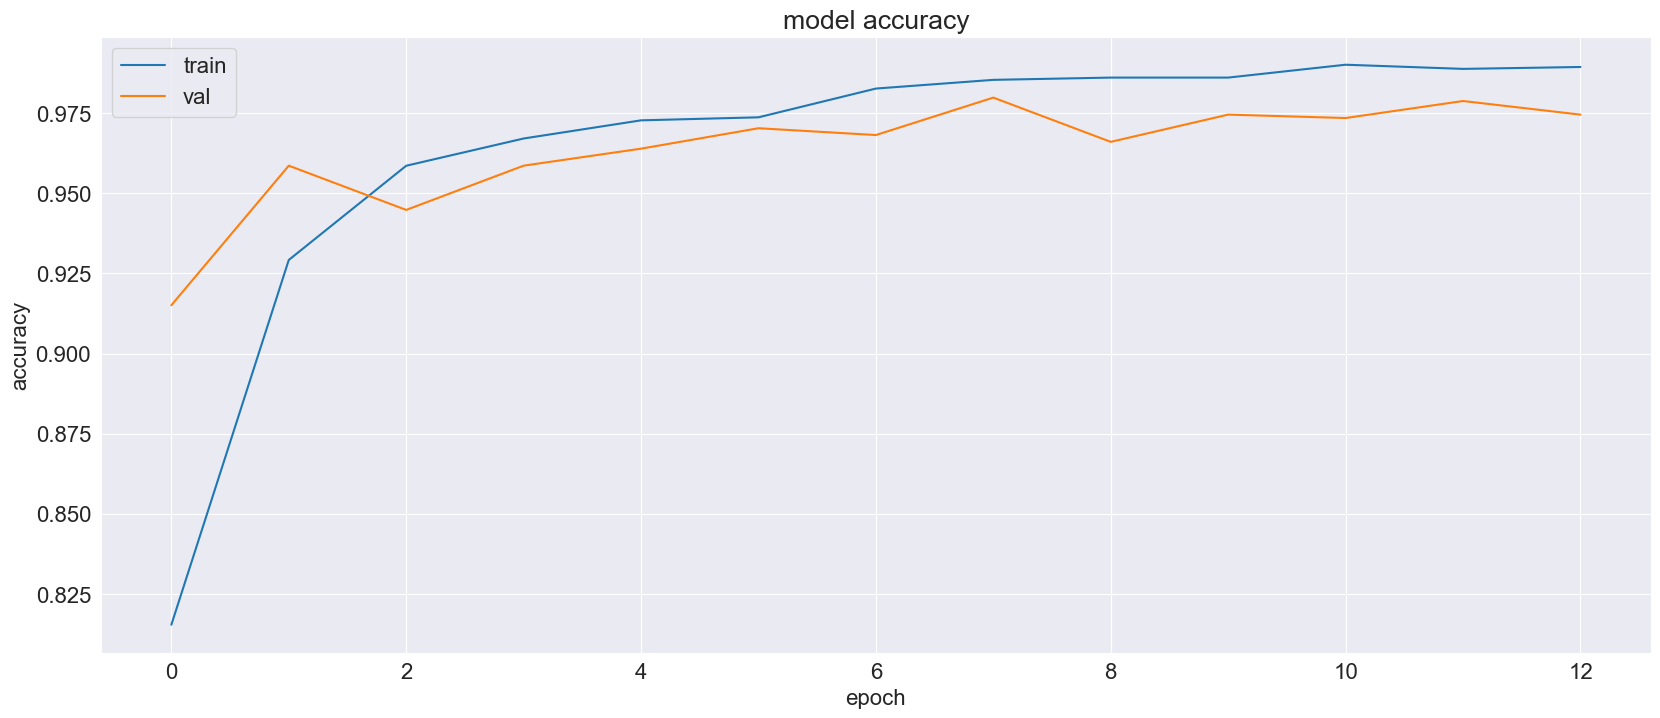

In [209]:
plt.figure(figsize=(20,8))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [210]:
y_pred = model.predict(X_test)

30/30 [==============================] - 0s 2ms/step


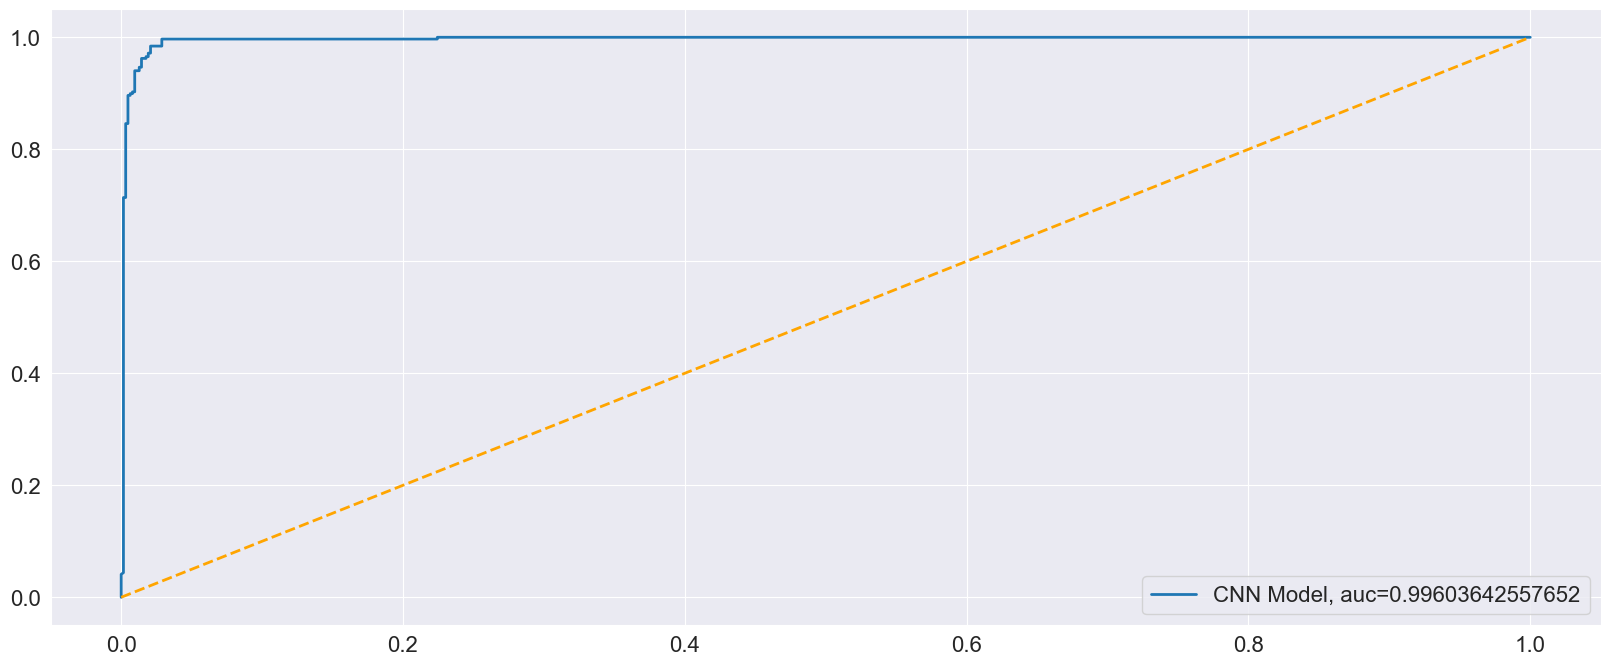

In [211]:
plt.figure(figsize=(20,8))
fpr, tpr, _ = roc_curve(y_test,  y_pred)
auc = roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="CNN Model, auc="+str(auc),lw=2)
plt.plot([0, 1], [0, 1], color="orange", lw=2, linestyle="--")
plt.legend(loc=4)
plt.show()

In [212]:
y_pred[y_pred>=0.5] = 1
y_pred[y_pred<0.5] = 0

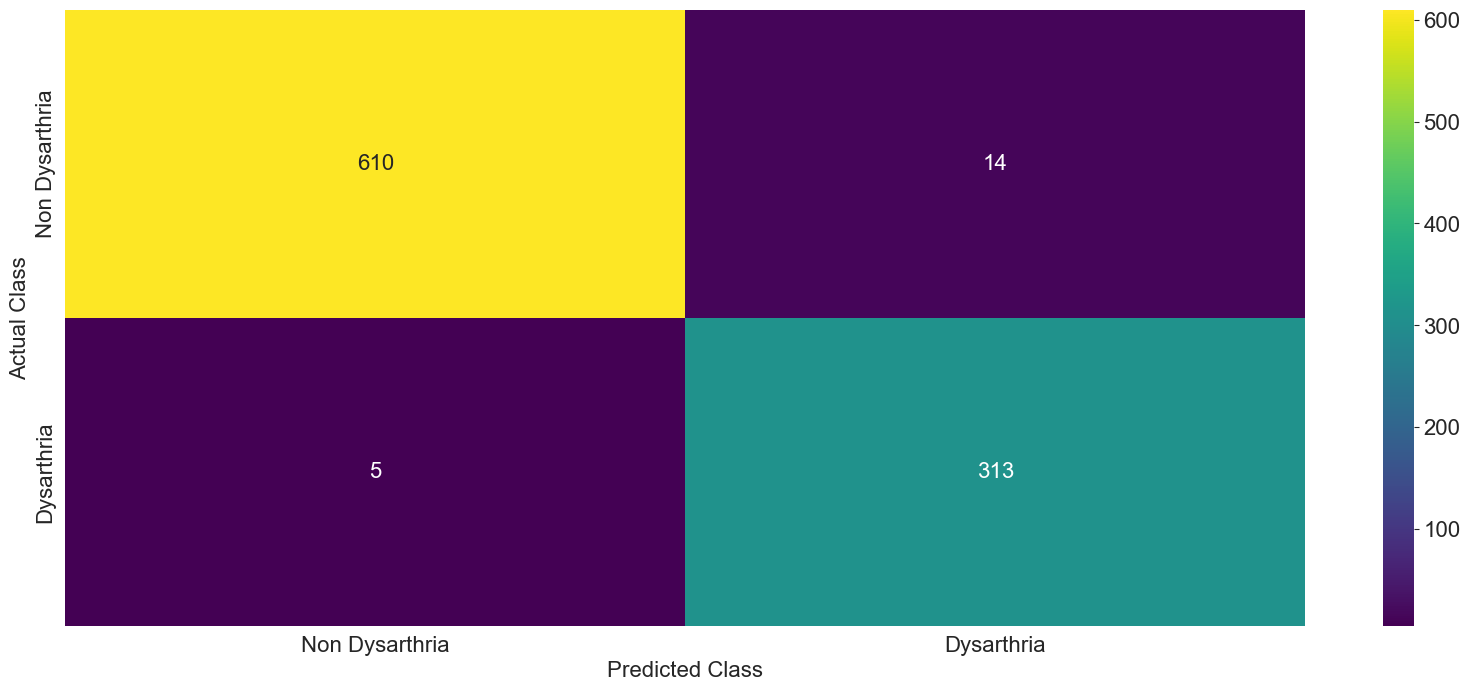

In [213]:
sns.heatmap(confusion_matrix(y_test, y_pred),cmap='viridis',annot=True,fmt='.3g',
            xticklabels=['Non Dysarthria','Dysarthria'],yticklabels=['Non Dysarthria','Dysarthria'])
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.show()

In [214]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.99      0.98      0.98       624
         1.0       0.96      0.98      0.97       318

    accuracy                           0.98       942
   macro avg       0.97      0.98      0.98       942
weighted avg       0.98      0.98      0.98       942



In [215]:
print("Recall Score of the Model: ",recall_score(y_test,y_pred))

Recall Score of the Model:  0.9842767295597484
